In [1]:
import numpy as np
from matplotlib import pyplot as plt
from salishsea_tools import viz_tools, evaltools as et
import netCDF4 as nc
import datetime as dt
import cmocean
import os
#from pandas.plotting import register_matplotlib_converters
#register_matplotlib_converters()

import warnings
warnings.filterwarnings("ignore")

%matplotlib inline

In [2]:
saveloc='/ocean/eolson/MEOPAR/tempfig'

In [3]:
with nc.Dataset('/ocean/eolson/MEOPAR/NEMO-forcing/grid/mesh_mask201702_noLPE.nc') as mesh:
    tmask=mesh.variables['tmask'][0,:,:,:]

In [4]:
# create list of hourly model files to loop through
start=dt.datetime(2020,4,1)
end=dt.datetime(2020,5,1)
flist=et.index_model_files(start,end,
                           '/results2/SalishSea/nowcast-green.201905/',
                           nam_fmt='nowcast',flen=1,ftype='grid_T',tres=1)

In [5]:
flist.head()

,paths,t_0,t_n
0,/results2/SalishSea/nowcast-green.201905/01apr...,2020-04-01,2020-04-02
1,/results2/SalishSea/nowcast-green.201905/02apr...,2020-04-02,2020-04-03
2,/results2/SalishSea/nowcast-green.201905/03apr...,2020-04-03,2020-04-04
3,/results2/SalishSea/nowcast-green.201905/04apr...,2020-04-04,2020-04-05
4,/results2/SalishSea/nowcast-green.201905/05apr...,2020-04-05,2020-04-06


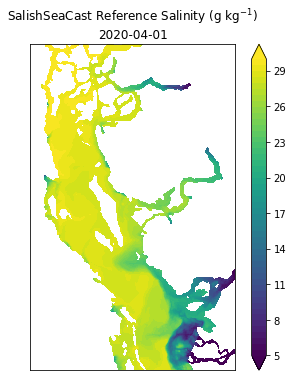

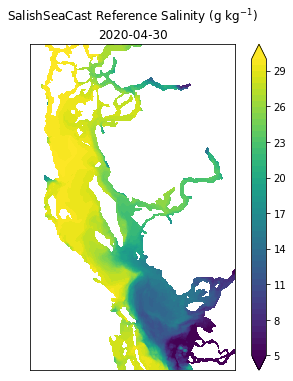

In [6]:
# create and save series of hourly figures
iw=100; ie=370
js=400; jn=830
iii=0 # counter for figure number
# loop  through daily files
for ind,row in flist.iterrows():
    f=nc.Dataset(row['paths'])
    date=row['t_0']
    # loop through hours, saving figure very 2nd hour
    for hr in range(0,24,2):
        if iii>1:
            plt.close(fig)
        fig,ax=plt.subplots(1,1,figsize=(6,6))
        m=ax.contourf(np.ma.masked_where(tmask[0,js:jn,iw:ie]==0,
                                       f.variables['vosaline'][hr,0,js:jn,iw:ie]),
                    np.arange(5,30.5,.5),vmin=5,vmax=30,extend='both')
        ax.set_aspect(1)
        fig.colorbar(m,ax=ax)
        ax.set_title('SalishSeaCast Reference Salinity (g kg$^{-1}$)\n'+\
                     date.strftime('%Y-%m-%d'))
        ax.xaxis.set_ticks([])
        ax.yaxis.set_ticks([])
        fig.savefig(saveloc+'/sal'+str(iii).zfill(4)+'.png',dpi=100)
        iii=iii+1
    f.close()

### use avconv to create movie from frames